<a href="https://colab.research.google.com/github/DocBot-Bangkit-2021/DocBot-MachineLearningModels/blob/main/Disease/Disease_Baseline_Model_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns

import os
import zipfile
import shutil

In [ ]:
plt.style.use('seaborn')

# **Data Loading**
[Dermnet](https://www.kaggle.com/shubhamgoel27/dermnet)

[skin disease image](https://www.kaggle.com/sanskar7447/skin-disease-image)

[Various Skin Diseases Dataset](https://www.kaggle.com/akshitmadan/various-skin-diseases-dataset)

This dataset contains 4 classes.

**Link for dataset in Google Drive**

https://drive.google.com/file/d/1Eyhs_V7YYz6h-1ctzSoIo_nYehNsd_Vn/view?usp=sharing

https://www.kaggle.com/nurimammasri/diseases

In [ ]:
# Use this to download easily (only on google colab)
# !gdown --id 1Eyhs_V7YYz6h-1ctzSoIo_nYehNsd_Vn

**Download dataset in Google Drive**

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1Eyhs_V7YYz6h-1ctzSoIo_nYehNsd_Vn/view?usp=sharing' # The shareable link

In [ ]:
# fluff, id = link.split('d/')
id = link.split('d/')[1].split('/view?')[0]
print (id)

1Eyhs_V7YYz6h-1ctzSoIo_nYehNsd_Vn


In [ ]:
downloaded = drive.CreateFile({'id':id})  #drive from PyDrive
downloaded.GetContentFile('diseases.zip')  

In [ ]:
file_zip = 'diseases.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('./diseases/')
zip_ref.close()

print(os.listdir('./diseases/'))

['conjunctivitis', 'melanoma', 'nail_fungus', 'cataracts']


# **Exploratory Data Analyis (EDA)**

In [ ]:
listdir_image = os.listdir('diseases')
print(listdir_image)

['conjunctivitis', 'melanoma', 'nail_fungus', 'cataracts']


In [ ]:
# check a lot of data for paper, rock and scissors
dir_image ='./diseases/'

for  item in listdir_image:
  class_dir = os.path.join(dir_image,item)
  print(item ," : ",len(os.listdir(class_dir)),"images")

conjunctivitis  :  956 images
melanoma  :  506 images
nail_fungus  :  580 images
cataracts  :  547 images


In [ ]:
# delete dir that is not used
import shutil

list_category = ['conjunctivitis', 'melanoma', 'nail_fungus', 'cataracts']

for x in listdir_image:
  if x not in list_category:
    path = os.path.join(dir_image, x)
    if os.path.isfile(path):
        os.remove(path)
    elif os.path.isdir(path):
        shutil.rmtree(path)
    else:
        print("Unknown or already remove!")

listdir_image = os.listdir(dir_image)
listdir_image

['conjunctivitis', 'melanoma', 'nail_fungus', 'cataracts']

In [ ]:
# check image (count, size, total)
from PIL import Image
total = 0

for x in listdir_image:
  dir = os.path.join(dir_image, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y
  
  size = (0,0)
  img_name = os.listdir(dir)
  for i in range(5):
    img_path = os.path.join(dir, img_name[i])
    img = Image.open(img_path)
    
    if size == img.size:
      continue
    else :
      size = img.size
      print('+ size = ',img.size)

print('\nTotal :', total)

conjunctivitis: 956
+ size =  (1100, 625)
+ size =  (241, 225)
+ size =  (275, 183)
+ size =  (281, 179)
+ size =  (327, 154)
melanoma: 506
+ size =  (720, 474)
+ size =  (299, 168)
+ size =  (258, 195)
+ size =  (275, 183)
+ size =  (720, 540)
nail_fungus: 580
+ size =  (1100, 826)
+ size =  (225, 225)
+ size =  (467, 720)
+ size =  (225, 225)
+ size =  (720, 472)
cataracts: 547
+ size =  (800, 400)
+ size =  (271, 228)
+ size =  (101, 84)
+ size =  (2200, 733)
+ size =  (268, 188)

Total : 2589


conjunctivitis


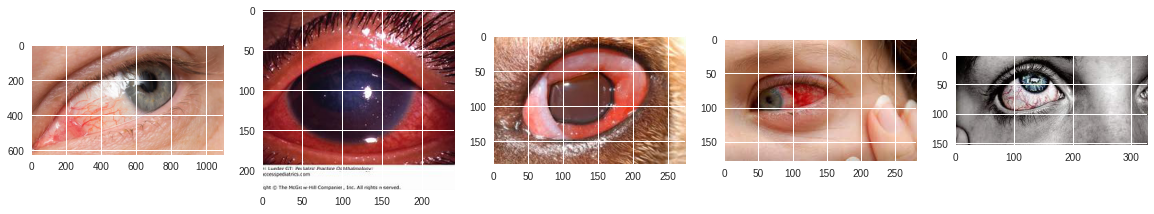

melanoma


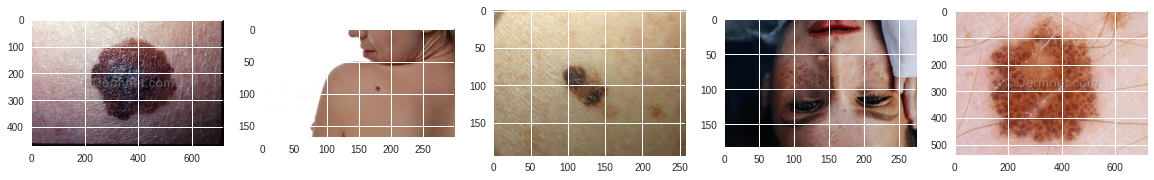

nail_fungus


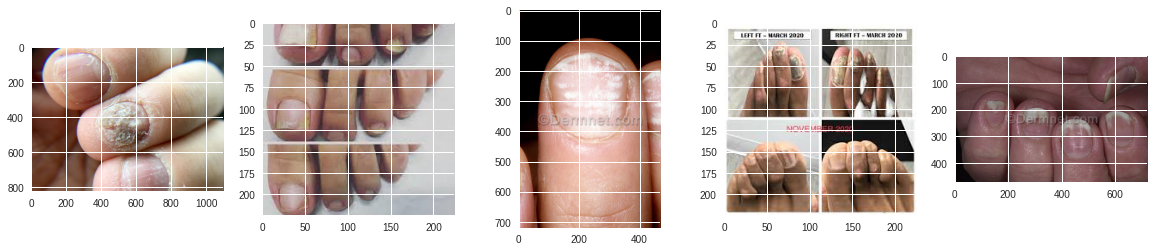

cataracts


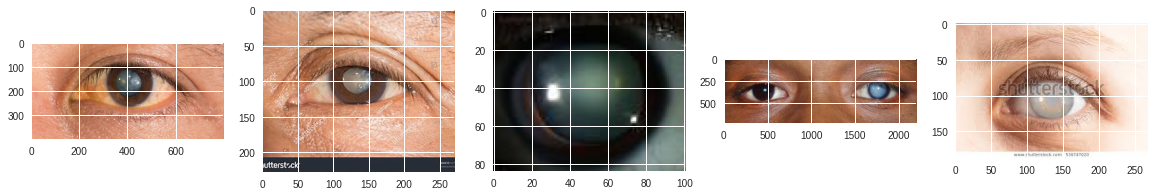

In [ ]:
# check images class
for  item in listdir_image:
  print(item)
  class_dir = os.path.join(dir_image,item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

# **Data Modeling 01**

In [ ]:
# import library for Machine Learning
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

## **Image Augmentation**

In [ ]:
# make imagedatagenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   
)

In [ ]:
batch_size = 64
train_generator = train_datagen.flow_from_directory(
    dir_image,
    target_size =(150,150),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dir_image,
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='validation'
)

Found 1894 images belonging to 4 classes.
Found 473 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'cataracts': 0, 'conjunctivitis': 1, 'melanoma': 2, 'nail_fungus': 3}

In [ ]:
validation_generator.class_indices

{'cataracts': 0, 'conjunctivitis': 1, 'melanoma': 2, 'nail_fungus': 3}

In [ ]:
label_types = []
for category in train_generator.class_indices:
  label_types.append(category)
label_types

['cataracts', 'conjunctivitis', 'melanoma', 'nail_fungus']

## **Train Model 01**

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 4 class output neuron.
    tf.keras.layers.Dense(4, activation='softmax')  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:
mc = ModelCheckpoint('best_model_1_v1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
train_generator.samples

1894

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
29/29 [==============================] - 54s 748ms/step - loss: 1.7193 - accuracy: 0.2918 - val_loss: 1.3588 - val_accuracy: 0.4196

Epoch 00001: val_accuracy improved from -inf to 0.41964, saving model to best_model_1_v1.h5
Epoch 2/100
29/29 [==============================] - 21s 738ms/step - loss: 1.3048 - accuracy: 0.4158 - val_loss: 1.3481 - val_accuracy: 0.3415

Epoch 00002: val_accuracy did not improve from 0.41964
Epoch 3/100
29/29 [==============================] - 21s 746ms/step - loss: 1.2429 - accuracy: 0.4661 - val_loss: 1.2096 - val_accuracy: 0.4487

Epoch 00003: val_accuracy improved from 0.41964 to 0.44866, saving model to best_model_1_v1.h5
Epoch 4/100
29/29 [==============================] - 21s 726ms/step - loss: 1.2075 - accuracy: 0.4798 - val_loss: 1.2365 - val_accuracy: 0.4241

Epoch 00004: val_accuracy did not improve from 0.44866
Epoch 5/100
29/29 [==============================] - 22s 752ms/step - loss: 1.0945 - accuracy: 0.5356 - val_loss: 1.2668 - 

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

8/8 [==============================] - 4s 497ms/step - loss: 0.5670 - accuracy: 0.7844
Accuracy (train):  0.8357972502708435
Accuracy: (test) 0.7843551635742188


### **Plot Model**

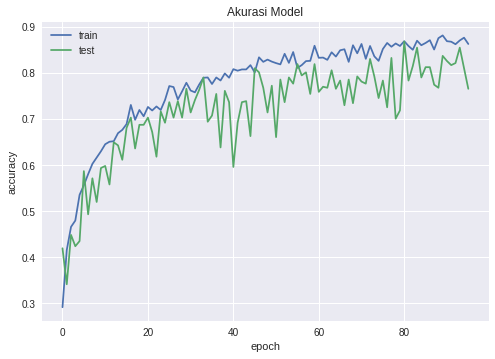

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

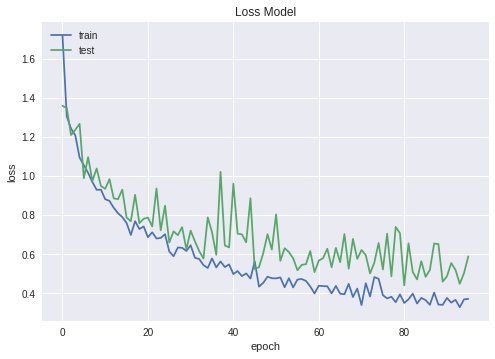

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

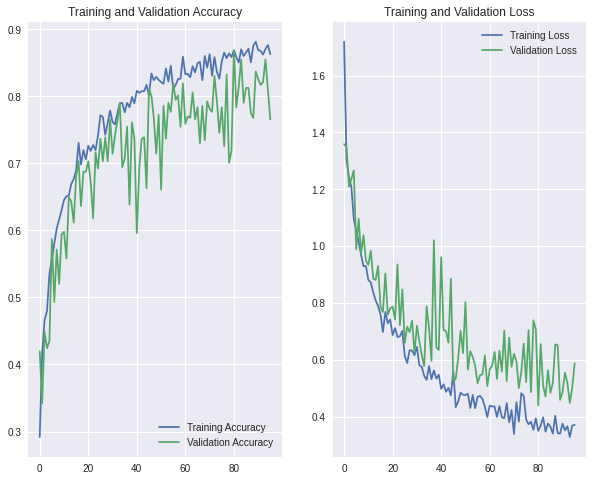

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving cataracts.jpg to cataracts.jpg
Cataracts


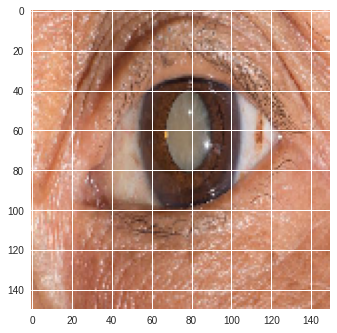

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[9.9357659e-01, 1.7556795e-03, 4.2859530e-03, 3.8177939e-04]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 232
drwxr-xr-x 2 root root   4096 Jun  3 11:57 assets
-rw-r--r-- 1 root root  22143 Jun  3 11:57 keras_metadata.pb
-rw-r--r-- 1 root root 203336 Jun  3 11:57 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 11:57 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v1.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v1.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v1.tflite')
    files.download('diseases_01_v1.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_1_v1.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 232
drwxr-xr-x 2 root root   4096 Jun  3 11:57 assets
-rw-r--r-- 1 root root  22143 Jun  3 11:57 keras_metadata.pb
-rw-r--r-- 1 root root 201673 Jun  3 11:57 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 11:57 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v1_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v1_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v1_best.tflite')
    files.download('diseases_01_v1_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 02**

In [ ]:
import tensorflow as tf
# from tensorflow.keras import applications, optimizers

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:
mc = ModelCheckpoint('best_model_1_v2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
29/29 [==============================] - 23s 773ms/step - loss: 1.3536 - accuracy: 0.3464 - val_loss: 1.2636 - val_accuracy: 0.3906

Epoch 00001: val_accuracy improved from -inf to 0.39062, saving model to best_model_1_v2.h5
Epoch 2/100
29/29 [==============================] - 22s 754ms/step - loss: 1.2203 - accuracy: 0.4601 - val_loss: 1.1669 - val_accuracy: 0.4710

Epoch 00002: val_accuracy improved from 0.39062 to 0.47098, saving model to best_model_1_v2.h5
Epoch 3/100
29/29 [==============================] - 21s 738ms/step - loss: 1.1034 - accuracy: 0.5514 - val_loss: 1.1876 - val_accuracy: 0.4665

Epoch 00003: val_accuracy did not improve from 0.47098
Epoch 4/100
29/29 [==============================] - 22s 754ms/step - loss: 1.0183 - accuracy: 0.5896 - val_loss: 1.0064 - val_accuracy: 0.5893

Epoch 00004: val_accuracy improved from 0.47098 to 0.58929, saving model to best_model_1_v2.h5
Epoch 5/100
29/29 [==============================] - 21s 745ms/step - loss: 0.9562 

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

8/8 [==============================] - 4s 521ms/step - loss: 0.3321 - accuracy: 0.9091
Accuracy (train):  0.9604012966156006
Accuracy: (test) 0.9090909361839294


### **Plot Model**

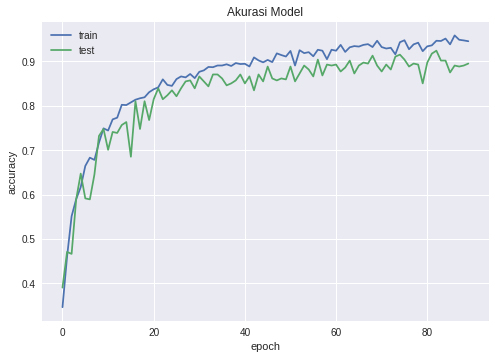

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

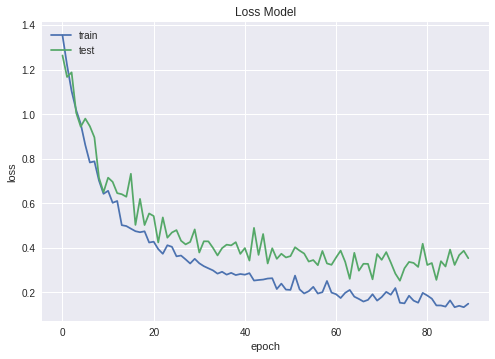

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

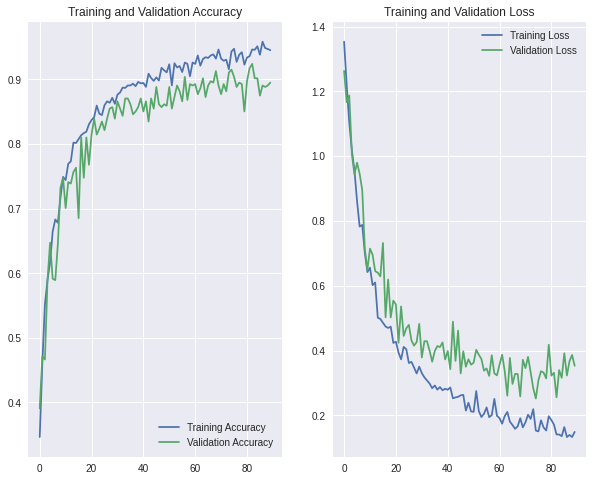

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving conjungtivitis.jpg to conjungtivitis.jpg
Conjunctivitis


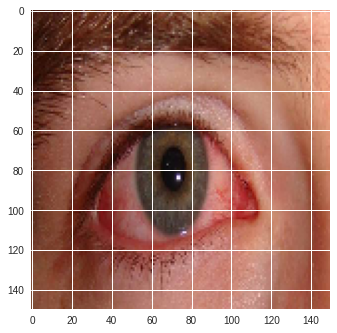

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:     
  print('Cataracts') 
elif predicted_class_indices == 1:   
  print('Conjunctivitis') 
elif predicted_class_indices == 2:   
  print('Melanoma') 
else:   
  print('Nail Fungus')

In [ ]:
classes

array([[1.4433598e-08, 1.0000000e+00, 4.6115218e-09, 7.2662948e-10]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 244
drwxr-xr-x 2 root root   4096 Jun  3 12:51 assets
-rw-r--r-- 1 root root  23532 Jun  3 12:51 keras_metadata.pb
-rw-r--r-- 1 root root 215869 Jun  3 12:51 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 12:51 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v2.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v2.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v2.tflite')
    files.download('diseases.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**


In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_1_v2.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 244
drwxr-xr-x 2 root root   4096 Jun  3 12:51 assets
-rw-r--r-- 1 root root  23532 Jun  3 12:51 keras_metadata.pb
-rw-r--r-- 1 root root 214109 Jun  3 12:51 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 12:51 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v2_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v2_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v2_best.tflite')
    files.download('diseases_01_v2_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 03**

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 4 class output neuron.
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)       

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:
mc = ModelCheckpoint('best_model_1_v3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(train_generator,
#                               validation_data=validation_generator,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
29/29 [==============================] - 23s 755ms/step - loss: 1.3840 - accuracy: 0.3071 - val_loss: 1.3005 - val_accuracy: 0.3527

Epoch 00001: val_accuracy improved from -inf to 0.35268, saving model to best_model_1_v3.h5
Epoch 2/100
29/29 [==============================] - 21s 745ms/step - loss: 1.2647 - accuracy: 0.4279 - val_loss: 1.2435 - val_accuracy: 0.5000

Epoch 00002: val_accuracy improved from 0.35268 to 0.50000, saving model to best_model_1_v3.h5
Epoch 3/100
29/29 [==============================] - 21s 740ms/step - loss: 1.1571 - accuracy: 0.5137 - val_loss: 1.1668 - val_accuracy: 0.4688

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/100
29/29 [==============================] - 22s 744ms/step - loss: 1.1066 - accuracy: 0.5486 - val_loss: 1.2622 - val_accuracy: 0.4799

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/100
29/29 [==============================] - 22s 745ms/step - loss: 1.0484 - accuracy: 0.5825 - val_loss: 0.9892 - 

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

8/8 [==============================] - 4s 494ms/step - loss: 0.3201 - accuracy: 0.8837
Accuracy (train):  0.9387539625167847
Accuracy: (test) 0.8837209343910217


### **Plot Model**

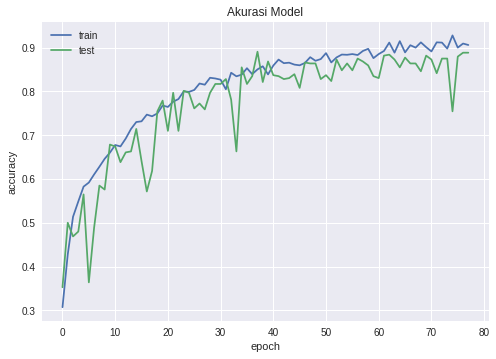

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

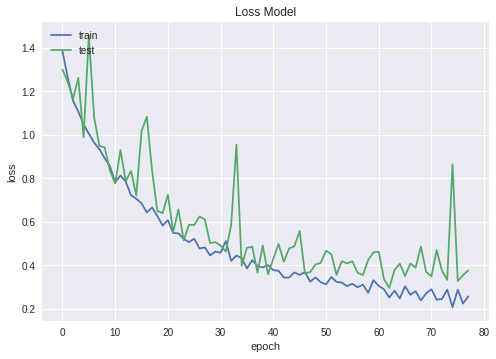

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

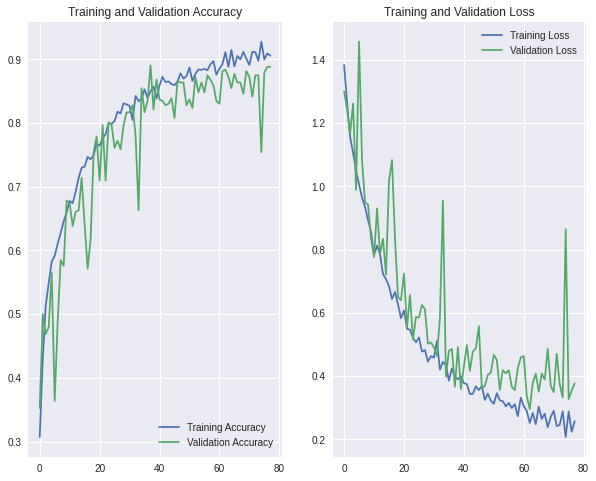

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving melanoma.jpg to melanoma.jpg
Melanoma


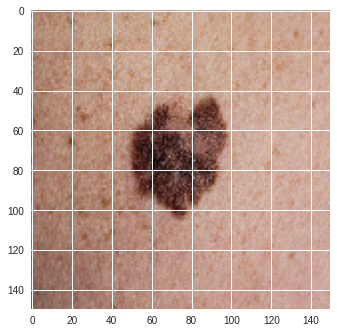

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:     
  print('Cataracts') 
elif predicted_class_indices == 1:   
  print('Conjunctivitis') 
elif predicted_class_indices == 2:   
  print('Melanoma') 
else:   
  print('Nail Fungus')

In [ ]:
classes

array([[6.3853797e-11, 1.3308521e-07, 9.9999738e-01, 2.5008740e-06]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 252
drwxr-xr-x 2 root root   4096 Jun  3 13:30 assets
-rw-r--r-- 1 root root  26746 Jun  3 13:30 keras_metadata.pb
-rw-r--r-- 1 root root 217445 Jun  3 13:30 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 13:30 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v3.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v3.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v3.tflite')
    files.download('diseases_01_v3.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_1_v3.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 248
drwxr-xr-x 2 root root   4096 Jun  3 13:30 assets
-rw-r--r-- 1 root root  26746 Jun  3 13:30 keras_metadata.pb
-rw-r--r-- 1 root root 215582 Jun  3 13:30 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 13:30 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v3_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v3_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v3_best.tflite')
    files.download('diseases_01_v3_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 04**

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')  
])
model.layers[0].trainable = False

234553344/234545216 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 5, 5, 2048)        58331648  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 1028      
Total params: 84,678,916
Trainable params: 26,347,268
Non-trainable params: 58,331,648
_________________________________

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:
mc = ModelCheckpoint('best_model_1_v4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(train_generator,
#                               validation_data=validation_generator,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
29/29 [==============================] - 35s 916ms/step - loss: 11.1284 - accuracy: 0.6973 - val_loss: 1.1206 - val_accuracy: 0.7746

Epoch 00001: val_accuracy improved from -inf to 0.77455, saving model to best_model_1_v4.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
29/29 [==============================] - 24s 824ms/step - loss: 1.4182 - accuracy: 0.7847 - val_loss: 0.7890 - val_accuracy: 0.8326

Epoch 00002: val_accuracy improved from 0.77455 to 0.83259, saving model to best_model_1_v4.h5
Epoch 3/100
29/29 [==============================] - 25s 842ms/step - loss: 0.7940 - accuracy: 0.8208 - val_loss: 0.6095 - val_accuracy: 0.8594

Epoch 00003: val_accuracy improved from 0.83259 to 0.85938, saving model to best_model_1_v4.h5
Epoch 4/100
29/29 [==============================] - 24s 822ms/step - loss: 0.5812 - accuracy: 0.8437 - val_loss: 0.4556 - val_accuracy: 0.8415

Epoch 00004: val_accuracy did not improve from 0.85938
Epoch 5/100
29/29 [==============================] - 24s 834ms/step - loss: 0.6987 - accuracy: 0.8179 - val_loss: 0.6613 - val_accuracy: 0.7969

Epoch 00005: val_accuracy did not improve from 0.85938
Epoch 6/100
29/29 [==============================] - 24s 822ms/step - loss: 0.5645 - accuracy: 0.8470 - val_loss: 0.4156

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

8/8 [==============================] - 5s 635ms/step - loss: 0.5542 - accuracy: 0.9281
Accuracy (train):  0.9514255523681641
Accuracy: (test) 0.9281184077262878


### **Plot Model**

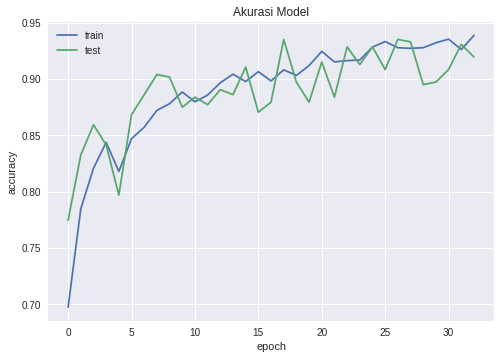

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

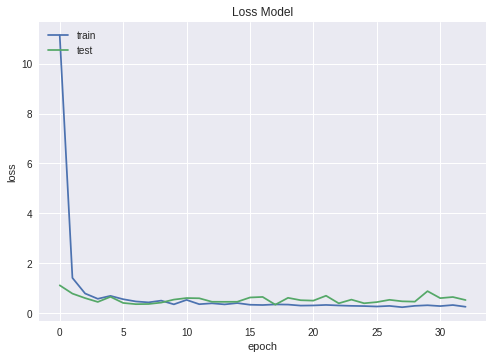

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

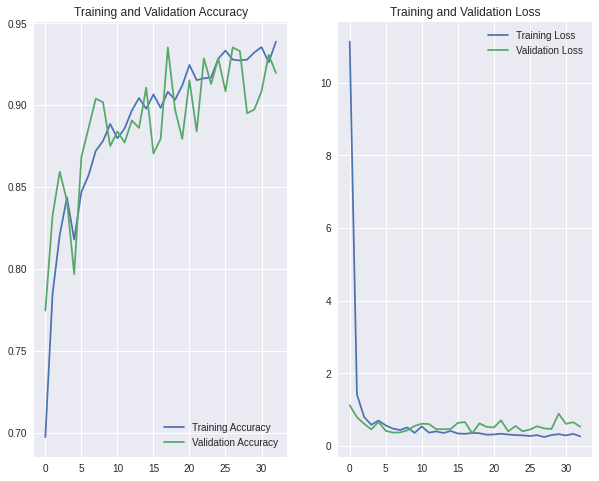

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving nail funggus.jpg to nail funggus.jpg
Nail Fungus


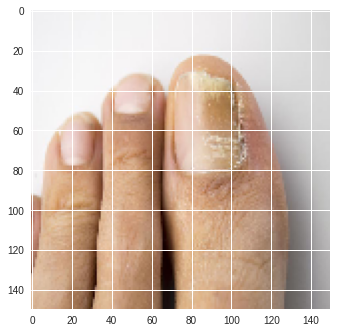

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:     
  print('Cataracts') 
elif predicted_class_indices == 1:   
  print('Conjunctivitis') 
elif predicted_class_indices == 2:   
  print('Melanoma') 
else:   
  print('Nail Fungus')

In [ ]:
classes

array([[0.0000000e+00, 4.7753897e-32, 5.2827311e-09, 1.0000000e+00]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 15192
drwxr-xr-x 2 root root     4096 Jun  3 13:55 assets
-rw-r--r-- 1 root root  1735735 Jun  3 13:55 keras_metadata.pb
-rw-r--r-- 1 root root 13809051 Jun  3 13:55 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  3 13:55 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v4.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v4.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v4.tflite')
    files.download('diseases_01_v4.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_1_v4.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 15192
drwxr-xr-x 2 root root     4096 Jun  3 13:57 assets
-rw-r--r-- 1 root root  1735734 Jun  3 13:57 keras_metadata.pb
-rw-r--r-- 1 root root 13807976 Jun  3 13:57 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  3 13:57 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v4_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v4_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v4_best.tflite')
    files.download('diseases_01_v4_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 05**

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121

model = tf.keras.Sequential([
    DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=(150, 150, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(4, activation='softmax')
])

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 4, 4, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)              

In [ ]:
do_fine_tuning = True #@param {type:"boolean"}

if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.9)
else:
    optimizer = "adam"

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:
mc = ModelCheckpoint('best_model_1_v5.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
29/29 [==============================] - 44s 1s/step - loss: 1.2709 - accuracy: 0.5202 - val_loss: 0.9832 - val_accuracy: 0.7009

Epoch 00001: val_accuracy improved from -inf to 0.70089, saving model to best_model_1_v5.h5
Epoch 2/100
29/29 [==============================] - 25s 853ms/step - loss: 0.4269 - accuracy: 0.8574 - val_loss: 0.6966 - val_accuracy: 0.7857

Epoch 00002: val_accuracy improved from 0.70089 to 0.78571, saving model to best_model_1_v5.h5
Epoch 3/100
29/29 [==============================] - 25s 852ms/step - loss: 0.2305 - accuracy: 0.9273 - val_loss: 0.4364 - val_accuracy: 0.8795

Epoch 00003: val_accuracy improved from 0.78571 to 0.87946, saving model to best_model_1_v5.h5
Epoch 4/100
29/29 [==============================] - 25s 842ms/step - loss: 0.1919 - accuracy: 0.9339 - val_loss: 0.2486 - val_accuracy: 0.9397

Epoch 00004: val_accuracy improved from 0.87946 to 0.93973, saving model to best_model_1_v5.h5
Epoch 5/100
29/29 [===========================

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

8/8 [==============================] - 5s 673ms/step - loss: 0.1141 - accuracy: 0.9683
Accuracy (train):  0.997360110282898
Accuracy: (test) 0.9682875275611877


### **Plot Model**

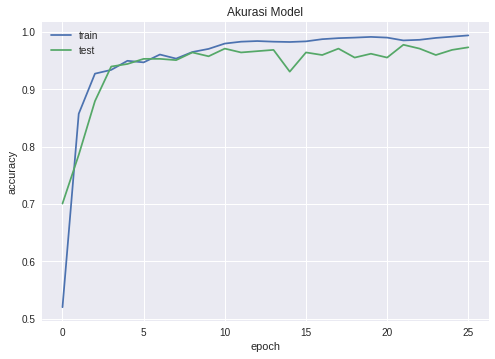

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

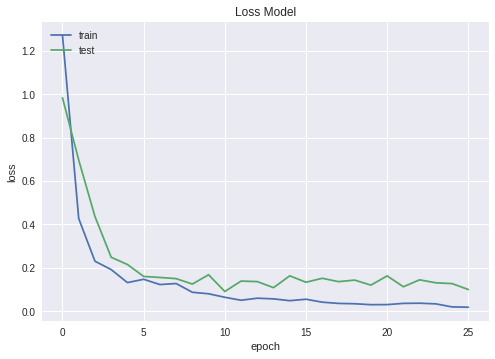

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

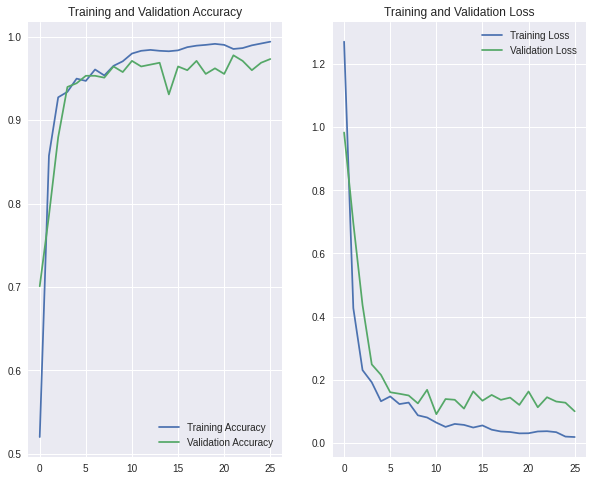

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving download.jpg to download.jpg
Conjunctivitis


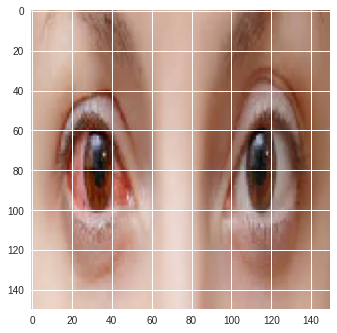

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:     
  print('Cataracts') 
elif predicted_class_indices == 1:   
  print('Conjunctivitis') 
elif predicted_class_indices == 2:   
  print('Melanoma') 
else:   
  print('Nail Fungus')

In [ ]:
classes

array([[3.2758885e-07, 9.9999964e-01, 2.0135765e-08, 2.0534120e-08]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 12564
drwxr-xr-x 2 root root     4096 Jun  3 14:35 assets
-rw-r--r-- 1 root root  1308111 Jun  3 14:35 keras_metadata.pb
-rw-r--r-- 1 root root 11545312 Jun  3 14:35 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  3 14:35 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v5.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v5.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v5.tflite')
    files.download('diseases_01_v5.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_1_v5.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 12548
drwxr-xr-x 2 root root     4096 Jun  3 14:36 assets
-rw-r--r-- 1 root root  1308111 Jun  3 14:36 keras_metadata.pb
-rw-r--r-- 1 root root 11527438 Jun  3 14:36 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  3 14:36 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v5_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v5_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v5_best.tflite')
    files.download('diseases_01_v5_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 06**

In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-06-03 15:12:53--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   129MB/s    in 0.6s    

2021-06-03 15:12:53 (129 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(local_weights_file)

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_200 (Conv2D)             (None, 74, 74, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_200[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(4, activation='softmax')(x) 

model = tf.keras.Model(pre_trained_model.input, x)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_200 (Conv2D)             (None, 74, 74, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_200[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [ ]:
# Fine Tuning
NUM_LAYERS = 10 #@param {type:"slider", min:1, max:50, step:1}
do_fine_tuning = True #@param {type:"boolean"}

if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.9)
    
    for layer in model.layers[-NUM_LAYERS:]:
        layer.trainable = True

    # Make all the layers in the pre-trained model trainable
    for layer in pre_trained_model.layers:
        layer.trainable = True
else:
    optimizer = 'adam'

    # Make all the layers in the pre-trained model non-trainable
    for layer in pre_trained_model.layers:
        layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:
mc = ModelCheckpoint('best_model_1_v6.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
29/29 [==============================] - 29s 851ms/step - loss: 0.9231 - accuracy: 0.6290 - val_loss: 0.6564 - val_accuracy: 0.7768

Epoch 00001: val_accuracy improved from -inf to 0.77679, saving model to best_model_1_v6.h5
Epoch 2/100
29/29 [==============================] - 23s 788ms/step - loss: 0.3796 - accuracy: 0.8727 - val_loss: 0.3738 - val_accuracy: 0.8705

Epoch 00002: val_accuracy improved from 0.77679 to 0.87054, saving model to best_model_1_v6.h5
Epoch 3/100
29/29 [==============================] - 23s 794ms/step - loss: 0.2524 - accuracy: 0.9175 - val_loss: 0.2707 - val_accuracy: 0.9286

Epoch 00003: val_accuracy improved from 0.87054 to 0.92857, saving model to best_model_1_v6.h5
Epoch 4/100
29/29 [==============================] - 23s 784ms/step - loss: 0.1950 - accuracy: 0.9393 - val_loss: 0.2914 - val_accuracy: 0.9219

Epoch 00004: val_accuracy did not improve from 0.92857
Epoch 5/100
29/29 [==============================] - 23s 797ms/step - loss: 0.1775 

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

8/8 [==============================] - 5s 570ms/step - loss: 0.1323 - accuracy: 0.9767
Accuracy (train):  0.997360110282898
Accuracy: (test) 0.9767441749572754


### **Plot Model**

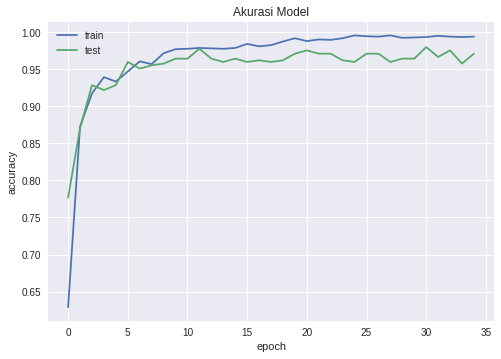

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

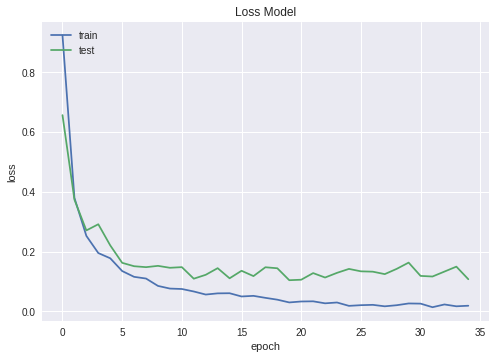

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

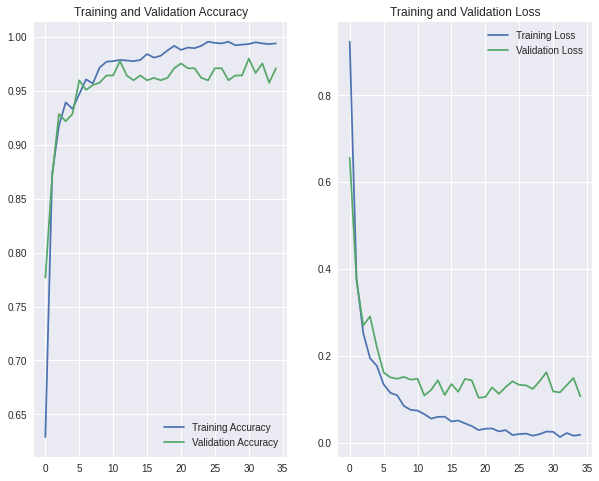

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving nail funggus.jpg to nail funggus (1).jpg
Nail Fungus


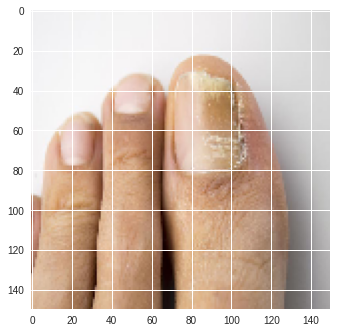

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:     
  print('Cataracts') 
elif predicted_class_indices == 1:   
  print('Conjunctivitis') 
elif predicted_class_indices == 2:   
  print('Melanoma') 
else:   
  print('Nail Fungus')

In [ ]:
classes

array([[8.1460483e-10, 5.6657647e-11, 2.4042132e-10, 1.0000000e+00]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 5428
drwxr-xr-x 2 root root    4096 Jun  3 15:39 assets
-rw-r--r-- 1 root root  482350 Jun  3 15:39 keras_metadata.pb
-rw-r--r-- 1 root root 5065233 Jun  3 15:39 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  3 15:39 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v6.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v6.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v6.tflite')
    files.download('diseases_01_v6.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_1_v6.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 5420
drwxr-xr-x 2 root root    4096 Jun  3 15:40 assets
-rw-r--r-- 1 root root  482350 Jun  3 15:40 keras_metadata.pb
-rw-r--r-- 1 root root 5058127 Jun  3 15:40 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  3 15:40 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v6_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v6_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v6_best.tflite')
    files.download('diseases_01_v6_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 07**

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import VGG19

model = tf.keras.models.Sequential([
    VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  
])
model.layers[0].trainable = False

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 1028      
Total params: 24,351,556
Trainable params: 4,327,172
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:
mc = ModelCheckpoint('best_model_1_v7.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(train_generator,
#                               validation_data=validation_generator,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
29/29 [==============================] - 32s 911ms/step - loss: 2.7259 - accuracy: 0.4967 - val_loss: 0.9419 - val_accuracy: 0.5580

Epoch 00001: val_accuracy improved from -inf to 0.55804, saving model to best_model_1_v7.h5
Epoch 2/100
29/29 [==============================] - 23s 778ms/step - loss: 0.7888 - accuracy: 0.6683 - val_loss: 0.5355 - val_accuracy: 0.7857

Epoch 00002: val_accuracy improved from 0.55804 to 0.78571, saving model to best_model_1_v7.h5
Epoch 3/100
29/29 [==============================] - 23s 788ms/step - loss: 0.6624 - accuracy: 0.7137 - val_loss: 0.5800 - val_accuracy: 0.7679

Epoch 00003: val_accuracy did not improve from 0.78571
Epoch 4/100
29/29 [==============================] - 23s 774ms/step - loss: 0.5602 - accuracy: 0.7639 - val_loss: 1.2457 - val_accuracy: 0.6161

Epoch 00004: val_accuracy did not improve from 0.78571
Epoch 5/100
29/29 [==============================] - 23s 783ms/step - loss: 0.5886 - accuracy: 0.7727 - val_loss: 0.6042 - 

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

8/8 [==============================] - 7s 839ms/step - loss: 0.3413 - accuracy: 0.9112
Accuracy (train):  0.9477296471595764
Accuracy: (test) 0.9112050533294678


### **Plot Model**

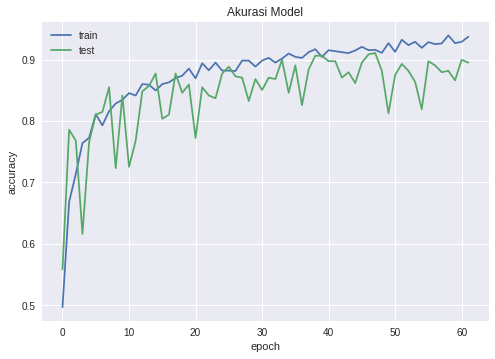

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

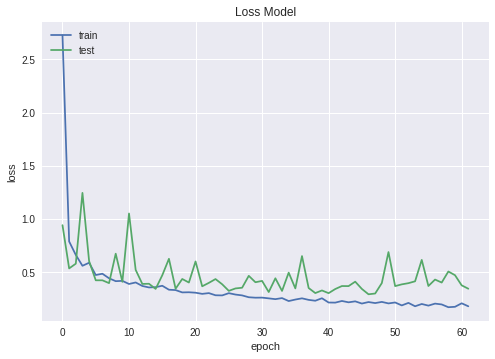

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

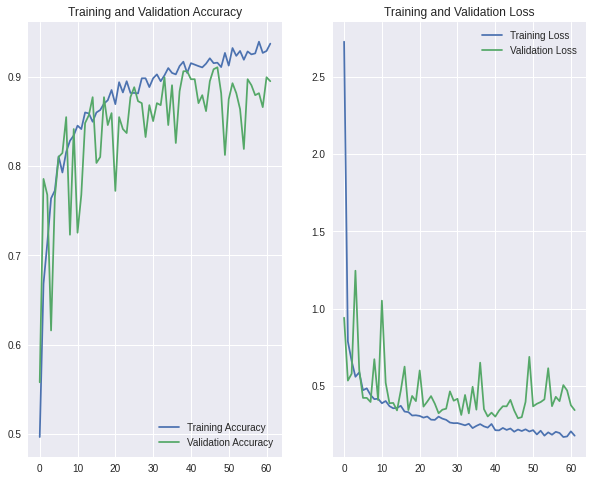

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving download.jpg to download (1).jpg
Conjunctivitis


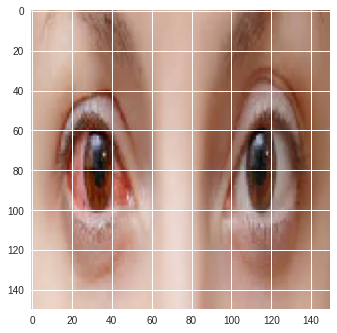

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:     
  print('Cataracts') 
elif predicted_class_indices == 1:   
  print('Conjunctivitis') 
elif predicted_class_indices == 2:   
  print('Melanoma') 
else:   
  print('Nail Fungus')

In [ ]:
classes

array([[2.1430958e-02, 9.7854793e-01, 1.1648335e-06, 1.9906813e-05]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 636
drwxr-xr-x 2 root root   4096 Jun  3 16:13 assets
-rw-r--r-- 1 root root  92593 Jun  3 16:13 keras_metadata.pb
-rw-r--r-- 1 root root 547921 Jun  3 16:13 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 16:13 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v7.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v7.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v7.tflite')
    files.download('diseases_01_v7.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_1_v7.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 636
drwxr-xr-x 2 root root   4096 Jun  3 16:13 assets
-rw-r--r-- 1 root root  92592 Jun  3 16:13 keras_metadata.pb
-rw-r--r-- 1 root root 546846 Jun  3 16:13 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 16:13 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v7_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v7_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v7_best.tflite')
    files.download('diseases_01_v7_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 08**

In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [ ]:
import tensorflow_hub as hub
do_fine_tuning = True #@param {type:"boolean"}

feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(len(list_category), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 2,228,996
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(0.002, momentum=0.9)
    feature_extractor.trainable = True
else: 
    feature_extractor.trainable = False
    optimizer = "adam"

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:
mc = ModelCheckpoint('best_model_1_v8.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
batch_size = 128
train_generator = train_datagen.flow_from_directory(
    dir_image,
    target_size =IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dir_image,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='validation'
)

Found 1894 images belonging to 4 classes.
Found 473 images belonging to 4 classes.


In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
14/14 [==============================] - 38s 3s/step - loss: 0.0898 - accuracy: 0.9989 - val_loss: 0.2009 - val_accuracy: 0.9609

Epoch 00001: val_accuracy did not improve from 0.97656
Epoch 2/100
14/14 [==============================] - 35s 2s/step - loss: 0.0891 - accuracy: 0.9994 - val_loss: 0.2149 - val_accuracy: 0.9688

Epoch 00002: val_accuracy did not improve from 0.97656
Epoch 3/100
14/14 [==============================] - 39s 3s/step - loss: 0.0928 - accuracy: 0.9983 - val_loss: 0.2130 - val_accuracy: 0.9635

Epoch 00003: val_accuracy did not improve from 0.97656
Epoch 4/100
14/14 [==============================] - 35s 2s/step - loss: 0.0884 - accuracy: 0.9989 - val_loss: 0.2351 - val_accuracy: 0.9557

Epoch 00004: val_accuracy did not improve from 0.97656
Epoch 5/100
14/14 [==============================] - 38s 3s/step - loss: 0.0903 - accuracy: 0.9989 - val_loss: 0.2597 - val_accuracy: 0.9505

Epoch 00005: val_accuracy did not improve from 0.97656
Epoch 6/100
14/

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

4/4 [==============================] - 7s 2s/step - loss: 0.2086 - accuracy: 0.9662
Accuracy (train):  1.0
Accuracy: (test) 0.9661733508110046


### **Plot Model**

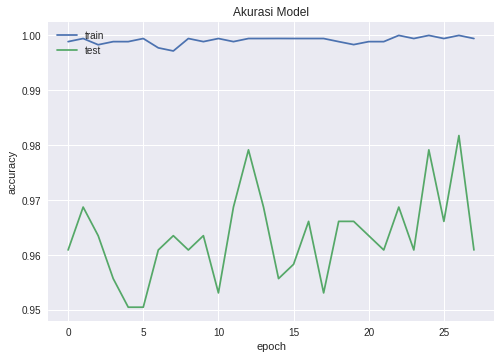

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

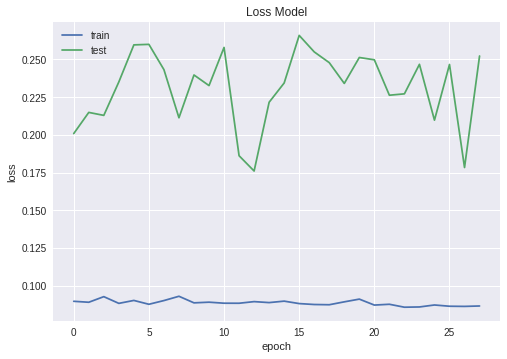

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

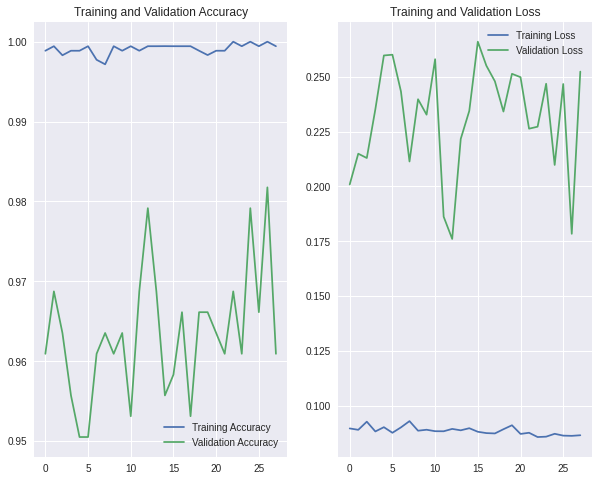

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving melanoma.jpg to melanoma (1).jpg
Melanoma


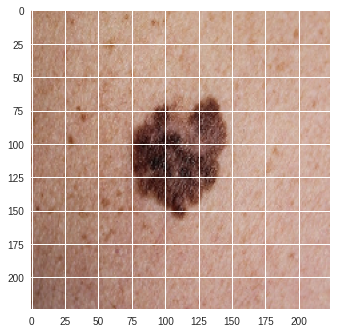

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:     
  print('Cataracts') 
elif predicted_class_indices == 1:   
  print('Conjunctivitis') 
elif predicted_class_indices == 2:   
  print('Melanoma') 
else:   
  print('Nail Fungus')

In [ ]:
classes

array([[1.2258909e-07, 3.1406634e-07, 9.9999893e-01, 6.1917069e-07]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets


INFO:tensorflow:Assets written to: /tmp/1/assets



export_path = /tmp/1
total 2708
drwxr-xr-x 2 root root    4096 Jun  3 17:16 assets
-rw-r--r-- 1 root root    5228 Jun  3 17:16 keras_metadata.pb
-rw-r--r-- 1 root root 2754462 Jun  3 17:16 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  3 17:16 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v8.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v8.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v8.tflite')
    files.download('diseases_01_v8.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_1_v8.h5', custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



INFO:tensorflow:Assets written to: /tmp/2/assets


INFO:tensorflow:Assets written to: /tmp/2/assets



export_path = /tmp/2
total 2032
drwxr-xr-x 2 root root    4096 Jun  3 17:17 assets
-rw-r--r-- 1 root root    3552 Jun  3 17:17 keras_metadata.pb
-rw-r--r-- 1 root root 2066182 Jun  3 17:17 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  3 17:17 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_01_v8_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_01_v8_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_01_v8_best.tflite')
    files.download('diseases_01_v8_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>